In [2]:
import pandas as pd
import numpy as np
from google.colab import files
from scipy.stats import ttest_1samp, ttest_ind, binom_test, ttest_rel
import scipy.stats as stats
import matplotlib.pyplot as plt

# Load data

In [3]:
uploaded_files = files.upload()

# Load the datasets complete
complete_table_learning = pd.read_csv('Complete_table_learning.csv')
complete_table_transfer = pd.read_csv('Complete_table_transfer.csv')
complete_table_estimate = pd.read_csv('Complete_table_estimate.csv')

# Load the datasets partial
partial_table_learning = pd.read_csv('Partial_table_learning.csv')
partial_table_transfer = pd.read_csv('Partial_table_transfer.csv')
partial_table_estimate = pd.read_csv('Partial_table_estimate.csv')

# Explore the datasets complete
print(complete_table_learning.head())
print(complete_table_transfer.head())
print(complete_table_estimate.head())

# Explore the datasets partial
print(partial_table_learning.head())
print(partial_table_transfer.head())
print(partial_table_estimate.head())

Saving Complete_table_estimate.csv to Complete_table_estimate.csv
Saving Complete_table_learning.csv to Complete_table_learning.csv
Saving Complete_table_transfer.csv to Complete_table_transfer.csv
Saving Partial_table_estimate.csv to Partial_table_estimate.csv
Saving Partial_table_learning.csv to Partial_table_learning.csv
Saving Partial_table_transfer.csv to Partial_table_transfer.csv
   condition  stimLeft  stimRight  action  chosen  rewLeft  rewRight        RT
0          1         3          1       1       3       58        52  1.465099
1          2         4          2       2       2       48        70  0.948690
2          2         2          4       2       4       38        42  0.865273
3          1         1          3       2       3       78        48  1.198528
4          2         2          4       2       4       48        38  1.814618
   stimLeft  stimRight  action  chosen   conf  RT_choice   RT_conf
0         4          1       2       1  0.664   8.459638  4.046991
1 

#  **2.2. Performance**

# - Learning Phase

# Performance

In [7]:

def performance_function(data):
    # Filtering by condition != 0
    data_no_zero = data[data['condition'] != 0]
    # Determine if the chosen option was advantageous
    data_no_zero['advantageous'] = ((data_no_zero['condition'] == 1) & (data_no_zero['chosen'] == 1)) | ((data_no_zero['condition'] == 2) & (data_no_zero['chosen'] == 2))
    # Calculate the percentage of advantageous choices
    advantageous_trials = data_no_zero['advantageous'].sum()
    total_trials = len(data_no_zero)
    performance_percentage = (advantageous_trials / total_trials)
    return performance_percentage

def performance_function_std(data):
    # Filtering by condition != 0
    data_no_zero = data[data['condition'] != 0]
    # Determine if the chosen option was advantageous
    data_no_zero['advantageous'] = ((data_no_zero['condition'] == 1) & (data_no_zero['chosen'] == 1)) | ((data_no_zero['condition'] == 2) & (data_no_zero['chosen'] == 2))
    # Calculate the percentage of advantageous choices
    performance_percentage_std = data_no_zero['advantageous'].std()
    return performance_percentage_std

def confidence_interval(data, confidence=0.95):
    # Filtering by condition != 0
    data_no_zero = data[data['condition'] != 0]
    # Calculate mean performance percentage
    mean_performance = performance_function(data_no_zero)

    # Calculate standard error of the mean (SEM)
    std_dev = performance_function_std(data_no_zero)
    n = len(data_no_zero)
    sem = std_dev / np.sqrt(n)

    # Determine the critical value
    critical_value = stats.norm.ppf((1 + confidence) / 2)

    # Calculate margin of error
    margin_of_error = critical_value * sem

    # Determine confidence interval
    confidence_interval = (mean_performance - margin_of_error, mean_performance + margin_of_error)

    return mean_performance, critical_value, std_dev, n, confidence_interval

# Performance in learning partial
performance_partial = performance_function(partial_table_learning)
performance_partial_std = performance_function_std(partial_table_learning)
mean_partial, z_partial, s_partial, n_partial, confidence_interval_partial = confidence_interval(partial_table_learning)

# Performance in learning complete
performance_complete = performance_function(complete_table_learning)
performance_complete_std = performance_function_std(complete_table_learning)
mean_complete, z_complete, s_complete, n_complete, confidence_interval_complete = confidence_interval(complete_table_learning)

print(f'Performance in learning in Partial Feedback: {performance_partial:.4f} ± {performance_partial_std:.4f}')
print(f'Performance in learning in Complete Feedback: {performance_complete:.4f} ± {performance_complete_std:.4f}')
print(f'Confidence interval of performance in learning in Partial Feedback: CI = {performance_partial:.4f} ± {(confidence_interval_partial[1]-performance_partial):.4f}')
print(f'Confidence interval of performance in learning in Complete Feedback: CI = {performance_complete:.4f} ± {(confidence_interval_complete[1]-performance_complete):.4f}')


Performance in learning in Partial Feedback: 0.7718 ± 0.4197
Performance in learning in Complete Feedback: 0.8893 ± 0.3138
Confidence interval of performance in learning in Partial Feedback: CI = 0.7718 ± 0.0099
Confidence interval of performance in learning in Complete Feedback: CI = 0.8893 ± 0.0066


<ipython-input-7-82f2ebe71950>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_no_zero['advantageous'] = ((data_no_zero['condition'] == 1) & (data_no_zero['chosen'] == 1)) | ((data_no_zero['condition'] == 2) & (data_no_zero['chosen'] == 2))
<ipython-input-7-82f2ebe71950>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_no_zero['advantageous'] = ((data_no_zero['condition'] == 1) & (data_no_zero['chosen'] == 1)) | ((data_no_zero['condition'] == 2) & (data_no_zero['chosen'] == 2))
<ipython-input-7-

# Plot A in figure 3

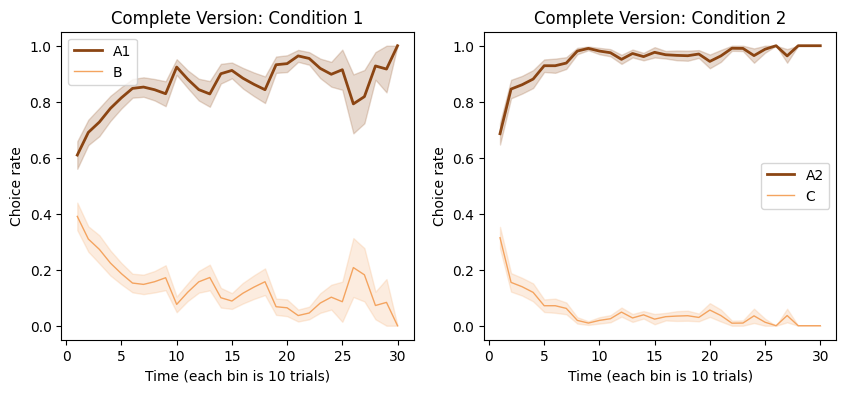

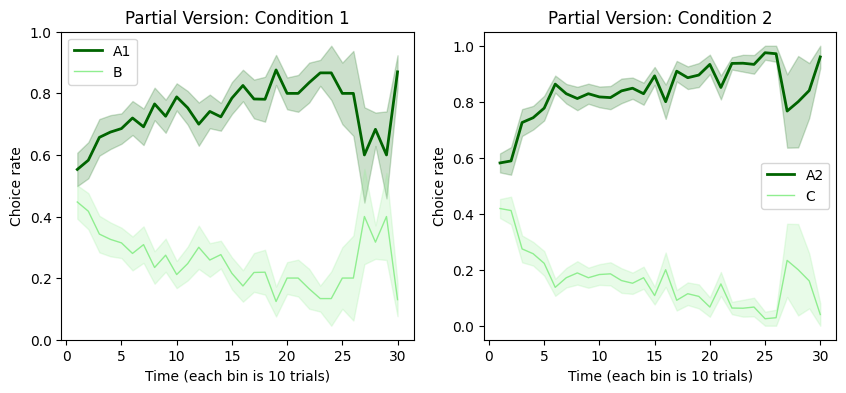

In [8]:
# Step 1: Separate chunks of participants
complete_learning_participant_chunks = [complete_table_learning.iloc[i:i+300] for i in range(0, len(complete_table_learning), 300)]
partial_learning_participant_chunks = [partial_table_learning.iloc[i:i+300] for i in range(0, len(partial_table_learning), 300)]

# Step 2: Split each chunk into bins containing 10 trials
def calculate_choice_rate(df):
    conditions = [1, 2]  # Focusing on conditions 1 and 2
    choice_rates = {condition: [] for condition in conditions}
    for condition in conditions:
        condition_df = df[df['condition'] == condition]
        for _, bin_df in condition_df.groupby(condition_df.index // 10):
            valid_choices = bin_df['chosen'].isin([1, 2, 3, 4])
            choice_rate = bin_df[valid_choices]['chosen'].value_counts(normalize=True).to_dict()
            choice_rates[condition].append(choice_rate)
    return choice_rates

# Step 3-4: Calculate the rate of the chosen option for each bin and condition
complete_learning_participant_chunks_rates = [calculate_choice_rate(participant) for participant in complete_learning_participant_chunks]
partial_learning_participant_chunks_rates = [calculate_choice_rate(participant) for participant in partial_learning_participant_chunks]

def cal_avg_rate(all_choice_rates):
    # Step 5: Calculate the average rate for each bin across all participants
    average_choice_rates = {}
    for condition in [1, 2]:
        collected_rates_main = [[] for _ in range(30)]
        collected_rates_secondary = [[] for _ in range(30)]
        for choice_rates in all_choice_rates:
            if condition in choice_rates:
                if condition == 1:
                    key_main, key_secondary = 1, 3  # For condition 1, plot rates for choosing 1 and 3
                else:
                    key_main, key_secondary = 2, 4  # For condition 2, plot rates for choosing 2 and 4
                for i, rate in enumerate(choice_rates[condition]):
                    collected_rates_main[i].append(rate.get(key_main, 0))
                    collected_rates_secondary[i].append(rate.get(key_secondary, 0))
        # Filter out empty lists and calculate mean and CI
        filtered_rates_main = [(np.mean(rate_list), stats.sem(rate_list)) if rate_list else (0, 0) for rate_list in collected_rates_main]
        filtered_rates_secondary = [(np.mean(rate_list), stats.sem(rate_list)) if rate_list else (0, 0) for rate_list in collected_rates_secondary]
        average_choice_rates[condition] = (filtered_rates_main, filtered_rates_secondary)
    return average_choice_rates

comp_average_choice_rates = {}
part_average_choice_rates = {}
comp_average_choice_rates = cal_avg_rate(complete_learning_participant_chunks_rates)
part_average_choice_rates = cal_avg_rate(partial_learning_participant_chunks_rates)

def draw_plot_3a(average_choice_rates, title_prefix, color_main, color_secondary, labels):
    # Step 6: Plotting the data with confidence intervals
    fig, ax = plt.subplots(1, 2, figsize=(10, 4))

    for i, (condition, (rates_main, rates_secondary)) in enumerate(average_choice_rates.items()):
        x = range(1, 31)
        y_main = [rate[0] for rate in rates_main]
        y_main_ci = [rate[1] for rate in rates_main]
        y_secondary = [rate[0] for rate in rates_secondary]
        y_secondary_ci = [rate[1] for rate in rates_secondary]

        main_label = labels[f'condition{condition}_main']
        secondary_label = labels[f'condition{condition}_secondary']

        ax[i].plot(x, y_main, label=f'{main_label}', color=color_main, linewidth=2)
        ax[i].fill_between(x, [y - ci for y, ci in zip(y_main, y_main_ci)], [y + ci for y, ci in zip(y_main, y_main_ci)], color=color_main, alpha=0.2)
        ax[i].plot(x, y_secondary, label=f'{secondary_label}', color=color_secondary, linewidth=1)
        ax[i].fill_between(x, [y - ci for y, ci in zip(y_secondary, y_secondary_ci)], [y + ci for y, ci in zip(y_secondary, y_secondary_ci)], color=color_secondary, alpha=0.2)
        ax[i].set_xlabel('Time (each bin is 10 trials)')
        ax[i].set_ylabel('Choice rate')
        ax[i].set_title(f'{title_prefix}: Condition {condition}')
        ax[i].legend()

    plt.show()

# Labels for the plots
labels_complete = {
    'condition1_main': 'A1',
    'condition1_secondary': 'B',
    'condition2_main': 'A2',
    'condition2_secondary': 'C'
}

labels_partial = {
    'condition1_main': 'A1',
    'condition1_secondary': 'B',
    'condition2_main': 'A2',
    'condition2_secondary': 'C'
}

# Plot complete version
draw_plot_3a(comp_average_choice_rates, "Complete Version", "saddlebrown", "sandybrown", labels_complete)

# Plot partial version
draw_plot_3a(part_average_choice_rates, "Partial Version", "darkgreen", "lightgreen", labels_partial)



# T-test between 0.5 & 2 versions

In [ ]:
# T-stat

# Split the data into chunks of 300 rows each (assuming each chunk represents a participant)
partial_chunks = [partial_table_learning.iloc[i:i + 300] for i in range(0, len(partial_table_learning), 300)]
complete_chunks = [complete_table_learning.iloc[i:i + 300] for i in range(0, len(complete_table_learning), 300)]

# Calculate performance for each chunk
partial_performances = [performance_function(chunk) for chunk in partial_chunks]
complete_performances = [performance_function(chunk) for chunk in complete_chunks]

# Apply t-test between the mean of the performances and 0.5
t_stat_partial, p_value_partial = ttest_1samp(partial_performances, 0.5)
dof_partial = len(partial_performances) - 1

t_stat_complete, p_value_complete = ttest_1samp(complete_performances, 0.5)
dof_complete = len(complete_performances) - 1

# Print results with high precision for the p-value
print(f'Performance in learning in Partial Feedback: t-statistic = {t_stat_partial:.10f}, p-value = {p_value_partial/2:.10e}, dof = {dof_partial}')
print(f'Performance in learning in Complete Feedback: t-statistic = {t_stat_complete:.10f}, p-value = {p_value_complete/2:.10e}, dof = {dof_complete}')


# Determine if the mean performance is greater than 0.5 for partial feedback
if t_stat_partial > 0:
    print("Partial result is significantly greater than 0.5.")
else:
    print("Partial result is less than or equal to 0.5")

# Determine if the mean performance is greater than 0.5 for complete feedback
if t_stat_complete > 0:
    print("Complete result is significantly greater than 0.5.")
else:
    print("Complete result is less than or equal to 0.5")



Performance in learning in Partial Feedback: t-statistic = 13.6786698959, p-value = 1.1040776109e-15, dof = 34
Performance in learning in Complete Feedback: t-statistic = 29.0488863659, p-value = 2.8382266840e-29, dof = 41
Partial result is greater than 0.5.
Complete result is greater than 0.5.


<ipython-input-11-6c310e57e232>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_no_zero['advantageous'] = (data_no_zero['condition'] == 1) & (data_no_zero['chosen'] == 1) | (data_no_zero['condition'] == 2) & (data_no_zero['chosen'] == 2)
<ipython-input-11-6c310e57e232>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_no_zero['advantageous'] = (data_no_zero['condition'] == 1) & (data_no_zero['chosen'] == 1) | (data_no_zero['condition'] == 2) & (data_no_zero['chosen'] == 2)
<ipython-input-11-6c310e

# T-test between complete & partial

In [ ]:
t_stat_comp_par, p_value_comp_par = ttest_ind(complete_performances, partial_performances)

# Degrees of freedom for two-sample t-test
dof_comp_par = len(complete_performances) + len(partial_performances) - 2


# Print results with high precision for the p-value
print(f'Performance in learning in Partial vs Complete Feedback: t-statistic = {t_stat_comp_par:.4f}, p-value = {p_value_comp_par/2:.4e}, dof = {dof_comp_par}')

if p_value_comp_par / 2 < 0.05 and t_stat_comp_par > 0:
    print("Complete feedback performance is significantly greater than partial feedback performance")
elif p_value_comp_par / 2 < 0.05 and t_stat_comp_par < 0:
    print("Partial feedback performance is significantly greater than complete feedback performance")
else:
    print("There is no significant difference in performance between complete and partial feedback")

Performance in learning in Partial vs Complete Feedback: t-statistic = 5.3522, p-value = 4.5603e-07, dof = 75
Complete feedback performance is significantly greater than partial feedback performance


# - Transfer Phase

# Performance

In [128]:
def performance_function_trns(data):
    # Determine if the chosen option was advantageous
    data['advantageous'] = ((data['chosen'] == data[['stimLeft', 'stimRight']].min(axis=1)) |
                            ((data['chosen'] == 2) & (data['stimLeft'] == 1) & (data['stimRight'] == 2)) |
                            ((data['chosen'] == 2) & (data['stimLeft'] == 2) & (data['stimRight'] == 1)))
    # Calculate the percentage of advantageous choices
    advantageous_trials = data['advantageous'].sum()
    total_trials = len(data)
    performance_percentage = (advantageous_trials / total_trials)
    return performance_percentage

def performance_function_std_trns(data):
    # Calculate the standard deviation of advantageous choices
    performance_percentage_std = data['advantageous'].std()
    return performance_percentage_std

def confidence_interval_trns(data, confidence=0.95):
    # Calculate mean performance percentage
    mean_performance = performance_function_trns(data)

    # Calculate standard error of the mean (SEM)
    std_dev = performance_function_std_trns(data)
    n = len(data)
    sem = std_dev / np.sqrt(n)

    # Determine the critical value
    critical_value = stats.norm.ppf((1 + confidence) / 2)

    # Calculate margin of error
    margin_of_error = critical_value * sem

    # Determine confidence interval
    confidence_interval = (mean_performance - margin_of_error, mean_performance + margin_of_error)

    return margin_of_error

# Performance in transfer partial
performance_partial_trns = performance_function_trns(partial_table_transfer)
performance_partial_trns_std = performance_function_std_trns(partial_table_transfer)
margin_of_error_partial_trns = confidence_interval_trns(partial_table_transfer)

# Performance in transfer complete
performance_complete_trns = performance_function_trns(complete_table_transfer)
performance_complete_trns_std = performance_function_std_trns(complete_table_transfer)
margin_of_error_complete_trns = confidence_interval_trns(complete_table_transfer)

print(f'Performance in transfer in Partial Feedback: {performance_partial_trns:.4f} ± {performance_partial_trns_std:.4f}')
print(f'Performance in transfer in Complete Feedback: {performance_complete_trns:.4f} ± {performance_complete_trns_std:.4f}')
print(f'Confidence interval of performance in transfer in partial Feedback: CI = {mean_partial_trns:.4f} ± {margin_of_error_partial_trns:.4f}')
print(f'Confidence interval of performance in transfer in Complete Feedback: CI = {mean_complete_trns:.4f} ± {margin_of_error_complete_trns:.4f}')


Performance in transfer in Partial Feedback: 0.9155 ± 0.2783
Performance in transfer in Complete Feedback: 0.9067 ± 0.2909
Confidence interval of performance in transfer in partial Feedback: CI = 0.9155 ± 0.0188
Confidence interval of performance in transfer in Complete Feedback: CI = 0.9067 ± 0.0180


# T-test between complete & partial

In [129]:
# T-stat

# Split the data into chunks of 300 rows each (assuming each chunk represents a participant)
partial_chunks_trns = [partial_table_transfer.iloc[i:i + 24] for i in range(0, len(partial_table_transfer), 24)]
complete_chunks_trns = [complete_table_transfer.iloc[i:i + 24] for i in range(0, len(complete_table_transfer), 24)]

# Calculate performance for each chunk
partial_performances_trns = [performance_function_trns(chunk) for chunk in partial_chunks_trns]
complete_performances_trns = [performance_function_trns(chunk) for chunk in complete_chunks_trns]

# Apply t-test between the mean of the performances and 0.5
t_stat_partial_trns, p_value_partial_trns = ttest_1samp(partial_performances_trns, 0.5)
dof_partial_trns = len(partial_performances_trns) - 1

t_stat_complete_trns, p_value_complete_trns = ttest_1samp(complete_performances_trns, 0.5)
dof_complete_trns = len(complete_performances_trns) - 1

# Print results with high precision for the p-value
print(f'Performance in transfer in Partial Feedback: t-statistic = {t_stat_partial_trns:.10f}, p-value = {p_value_partial_trns/2:.10e}, dof = {dof_partial_trns}')
print(f'Performance in transfer in Complete Feedback: t-statistic = {t_stat_complete_trns:.10f}, p-value = {p_value_complete_trns/2:.10e}, dof = {dof_complete_trns}')

# Determine if the mean performance is greater than 0.5 for partial feedback
if t_stat_partial_trns > 0:
    print("Partial result is greater than 0.5.")
else:
    print("Partial result is equal or less than 0.5")

# Determine if the mean performance is greater than 0.5 for complete feedback
if t_stat_complete_trns > 0:
    print("Complete result is significantly greater than 0.5.")
else:
    print("Complete result is significantly equal or less than 0.5")


Performance in transfer in Partial Feedback: t-statistic = 27.1116821404, p-value = 6.5345899686e-25, dof = 34
Performance in transfer in Complete Feedback: t-statistic = 27.2111939478, p-value = 3.6359720297e-28, dof = 41
Partial result is greater than 0.5.
Complete result is greater than 0.5.


<ipython-input-128-0c30f30bfabf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['advantageous'] = ((data['chosen'] == data[['stimLeft', 'stimRight']].min(axis=1)) |
<ipython-input-128-0c30f30bfabf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['advantageous'] = ((data['chosen'] == data[['stimLeft', 'stimRight']].min(axis=1)) |
<ipython-input-128-0c30f30bfabf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

# average confidence

In [ ]:
# Complete:
# Calculate average confidence when advantageous is True
comp_conf_avg_advntg_trns = complete_table_transfer.loc[complete_table_transfer['advantageous'], 'conf'].mean()
comp_conf_avg_advntg_trns_std = complete_table_transfer.loc[complete_table_transfer['advantageous'], 'conf'].std()
# Calculate average confidence when advantageous is False
comp_conf_avg_nonadvntg_trns = complete_table_transfer.loc[~complete_table_transfer['advantageous'], 'conf'].mean()
comp_conf_avg_nonadvntg_trns_std = complete_table_transfer.loc[~complete_table_transfer['advantageous'], 'conf'].std()


print("Complete:")
print(f'Average confidence when the option is advantageous: {comp_conf_avg_advntg_trns:.4f} ± {comp_conf_avg_advntg_trns_std:.4f}')
print(f'Average confidence when the option is not advantageous: {comp_conf_avg_nonadvntg_trns:.4f} ± {comp_conf_avg_nonadvntg_trns_std:.4f}')

# Partial:
# Calculate average confidence when advantageous is True
part_conf_avg_advntg_trns = partial_table_transfer.loc[partial_table_transfer['advantageous'], 'conf'].mean()
part_conf_avg_advntg_trns_std = partial_table_transfer.loc[partial_table_transfer['advantageous'], 'conf'].std()
# Calculate average confidence when advantageous is False
part_conf_avg_nonadvntg_trns = partial_table_transfer.loc[~partial_table_transfer['advantageous'], 'conf'].mean()
part_conf_avg_nonadvntg_trns_std = partial_table_transfer.loc[~partial_table_transfer['advantageous'], 'conf'].std()

print("Partial:")
print(f'Average confidence when the option is advantageous: {part_conf_avg_advntg_trns:.4f} ± {part_conf_avg_advntg_trns_std:.4f}')
print(f'Average confidence when the option is not advantageous: {part_conf_avg_nonadvntg_trns:.4f} ± {part_conf_avg_nonadvntg_trns_std:.4f}')

Complete:
Average confidence when the option is advantageous: 0.7940 ± 0.2051
Average confidence when the option is not advantageous: 0.6129 ± 0.2103
Partial:
Average confidence when the option is advantageous: 0.7555 ± 0.2006
Average confidence when the option is not advantageous: 0.5388 ± 0.2284


# **2.3. Contextual Effect**

# - Transfer Phase

# Binomial test on A1 and A2 in the first trial

In [48]:
# Partial
partial_table_transfer['participant_id'] = (partial_table_transfer.index // 24) + 1

partial_table_transfer_filtered = partial_table_transfer[
    partial_table_transfer[['stimLeft', 'stimRight']].apply(lambda x: {1, 2} == set(x.values), axis=1)
]

# Group by participant ID and take the first row of each group
partial_table_transfer_filtered_first = partial_table_transfer_filtered.groupby('participant_id').first().reset_index()

# Occurrence count of 1 and 2 in the chosen options
partial_count_1 = ((partial_table_transfer_filtered_first['chosen'] == 1)).sum()
partial_count_2 = ((partial_table_transfer_filtered_first['chosen'] == 2) ).sum()

# Total count of trials
partial_total_count = 35

# Calculate the ratio of option 1 to option 2
partial_ratio = partial_count_2 / partial_total_count

# Perform the binomial test
# Null hypothesis: the proportion of 1's is 0.5
partial_transfer_first_pval = binom_test(partial_count_1, n=partial_total_count, p=0.5, alternative='less')

print("Partial:")
print(f'Ratio: {partial_ratio:.4f}')
print(f'P-value from binomial test: {partial_transfer_first_pval:.4f}')
if partial_transfer_first_pval < 0.05:
    print('Participants’ significantly prefer A2 over A1.')
else:
    print('Participants’ doesn\'t significantly prefer A2 over A1.')



# Complete
complete_table_transfer['participant_id'] = (complete_table_transfer.index // 24) + 1

complete_table_transfer_filtered = complete_table_transfer[
    complete_table_transfer[['stimLeft', 'stimRight']].apply(lambda x: {1, 2} == set(x.values), axis=1)
]

# Group by participant ID and take the first row of each group
complete_table_transfer_filtered_first = complete_table_transfer_filtered.groupby('participant_id').first().reset_index()

# Occurrence count of 1 and 2 in the chosen options
complete_count_1 = ((complete_table_transfer_filtered_first['chosen'] == 1)).sum()
complete_count_2 = ((complete_table_transfer_filtered_first['chosen'] == 2) ).sum()

# Total count of trials
complete_total_count = 42

# Calculate the ratio of option 1 to option 2
complete_ratio = complete_count_2 / complete_total_count

# Perform the binomial test
# Null hypothesis: the proportion of 1's is 0.5
complete_transfer_first_pval = binom_test(complete_count_1, n=complete_total_count, p=0.5, alternative='less')

print("Complete:")
print(f'Ratio: {complete_ratio:.4f}')
print(f'P-value from binomial test: {complete_transfer_first_pval:.4f}')
if complete_transfer_first_pval < 0.05:
    print('Participants’ significantly prefer A2 over A1.')
else:
    print('Participants’ doesn\'t significantly prefer A2 over A1.')

Partial:
Ratio: 0.6571
P-value from binomial test: 0.0448
Participants’ significantly prefer A2 over A1.
Complete:
Ratio: 0.6667
P-value from binomial test: 0.0218
Participants’ significantly prefer A2 over A1.


<ipython-input-48-f332da5907db>:23: DeprecationWarning: 'binom_test' is deprecated in favour of 'binomtest' from version 1.7.0 and will be removed in Scipy 1.12.0.
  partial_transfer_first_pval = binom_test(partial_count_1, n=partial_total_count, p=0.5, alternative='less')
<ipython-input-48-f332da5907db>:57: DeprecationWarning: 'binom_test' is deprecated in favour of 'binomtest' from version 1.7.0 and will be removed in Scipy 1.12.0.
  complete_transfer_first_pval = binom_test(complete_count_1, n=complete_total_count, p=0.5, alternative='less')


# Plots of figure 2

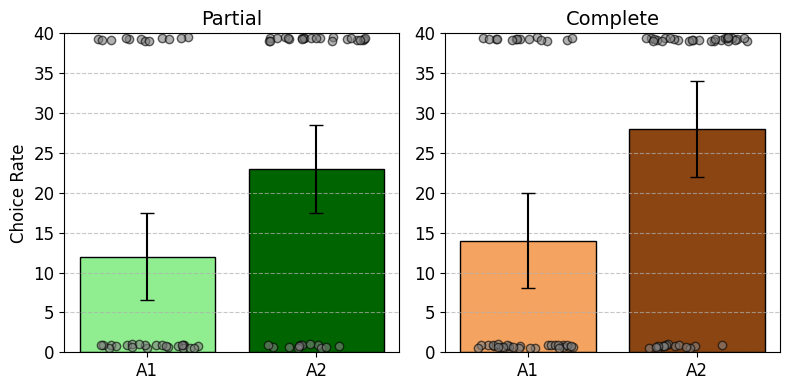

In [70]:
def calculate_confidence_interval(count, total, confidence_level=0.95):
    prop = count / total
    z = 1.96  # for 95% confidence interval
    se = np.sqrt((prop * (1 - prop)) / total)
    ci_low = prop - z * se
    ci_high = prop + z * se
    return ci_low * total, ci_high * total

# Calculate confidence intervals
partial_ci_1 = calculate_confidence_interval(partial_count_1, partial_total_count)
partial_ci_2 = calculate_confidence_interval(partial_count_2, partial_total_count)
complete_ci_1 = calculate_confidence_interval(complete_count_1, complete_total_count)
complete_ci_2 = calculate_confidence_interval(complete_count_2, complete_total_count)

# Plotting the results
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

# Partial plot
axes[0].bar(['A1', 'A2'], [partial_count_1, partial_count_2], color=['lightgreen', 'darkgreen'], edgecolor='black')
axes[0].set_title('Partial', fontsize=14)
axes[0].set_ylabel('Choice Rate', fontsize=12)
axes[0].set_ylim(0, 40)
axes[0].tick_params(axis='x', labelsize=12)
axes[0].tick_params(axis='y', labelsize=12)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Add confidence intervals
axes[0].errorbar(['A1', 'A2'], [partial_count_1, partial_count_2],
                 yerr=[(partial_count_1 - partial_ci_1[0], partial_ci_1[1] - partial_count_1),
                       (partial_count_2 - partial_ci_2[0], partial_ci_2[1] - partial_count_2)],
                 fmt='none', ecolor='black', capsize=5)

# Add dots for Partial counts
partial_dots_x_A1 = np.random.uniform(-0.3, 0.3, size=partial_count_1) + 0  # Centered around 'A1'
partial_dots_x_A2 = np.random.uniform(-0.3, 0.3, size=partial_count_2) + 1  # Centered around 'A2'
partial_dots_y_A1 = np.random.uniform(39, 39.5, size=partial_count_1)
partial_dots_y_A2 = np.random.uniform(39, 39.5, size=partial_count_2)
partial_dots_x_A1_ = np.random.uniform(-0.3, 0.3, size=partial_count_2) + 0  # Centered around 'A1'
partial_dots_x_A2_ = np.random.uniform(-0.3, 0.3, size=partial_count_1) + 1  # Centered around 'A2'
partial_dots_y_A1_ = np.random.uniform(0.5, 1, size=partial_count_2)
partial_dots_y_A2_ = np.random.uniform(0.5, 1, size=partial_count_1)
axes[0].scatter(partial_dots_x_A1, partial_dots_y_A1, color='gray', alpha=0.6, edgecolor='black')
axes[0].scatter(partial_dots_x_A2, partial_dots_y_A2, color='gray', alpha=0.6, edgecolor='black')
axes[0].scatter(partial_dots_x_A1_, partial_dots_y_A1_, color='gray', alpha=0.6, edgecolor='black')
axes[0].scatter(partial_dots_x_A2_, partial_dots_y_A2_, color='gray', alpha=0.6, edgecolor='black')

# Complete plot
axes[1].bar(['A1', 'A2'], [complete_count_1, complete_count_2], color=['sandybrown', 'saddlebrown'], edgecolor='black')
axes[1].set_title('Complete', fontsize=14)
axes[1].set_ylim(0, 40)
axes[1].tick_params(axis='x', labelsize=12)
axes[1].tick_params(axis='y', labelsize=12)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# Add confidence intervals
axes[1].errorbar(['A1', 'A2'], [complete_count_1, complete_count_2],
                 yerr=[(complete_count_1 - complete_ci_1[0], complete_ci_1[1] - complete_count_1),
                       (complete_count_2 - complete_ci_2[0], complete_ci_2[1] - complete_count_2)],
                 fmt='none', ecolor='black', capsize=5)

# Add dots for Complete counts
complete_dots_x_A1 = np.random.uniform(-0.3, 0.3, size=complete_count_1) + 0  # Centered around 'A1'
complete_dots_x_A2 = np.random.uniform(-0.3, 0.3, size=complete_count_2) + 1  # Centered around 'A2'
complete_dots_y_A1 = np.random.uniform(39, 39.5, size=complete_count_1)
complete_dots_y_A2 = np.random.uniform(39, 39.5, size=complete_count_2)
complete_dots_x_A1_ = np.random.uniform(-0.3, 0.3, size=complete_count_2) + 0  # Centered around 'A1'
complete_dots_x_A2_ = np.random.uniform(-0.3, 0.3, size=complete_count_1) + 1  # Centered around 'A2'
complete_dots_y_A1_ = np.random.uniform(0.5, 1, size=complete_count_2)
complete_dots_y_A2_ = np.random.uniform(0.5, 1, size=complete_count_1)
axes[1].scatter(complete_dots_x_A1, complete_dots_y_A1, color='gray', alpha=0.6, edgecolor='black')
axes[1].scatter(complete_dots_x_A2, complete_dots_y_A2, color='gray', alpha=0.6, edgecolor='black')
axes[1].scatter(complete_dots_x_A1_, complete_dots_y_A1_, color='gray', alpha=0.6, edgecolor='black')
axes[1].scatter(complete_dots_x_A2_, complete_dots_y_A2_, color='gray', alpha=0.6, edgecolor='black')

plt.tight_layout()
plt.show()

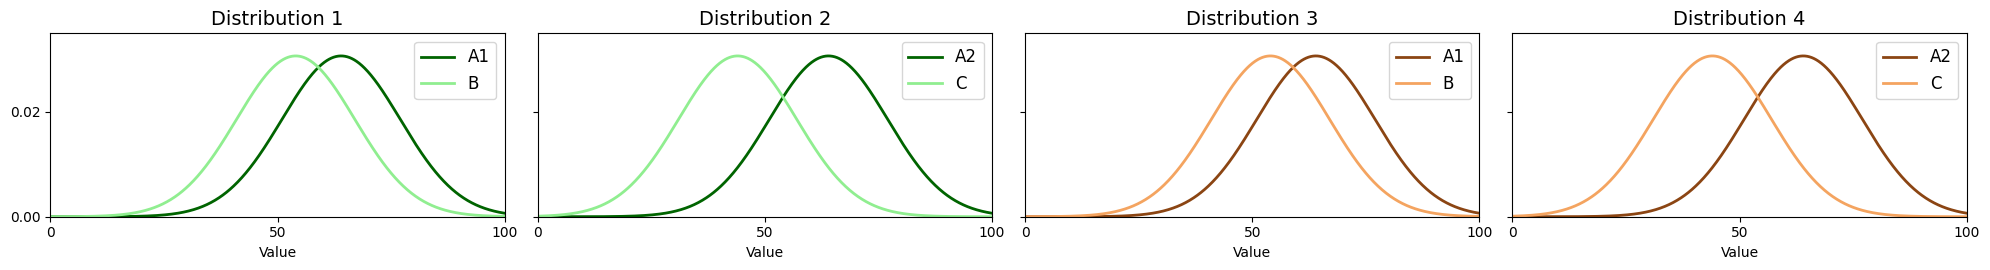

In [71]:
# Define the parameters for the normal distributions with unique colors
params = [
    {'mean': 64, 'std': 13, 'label': 'A1', 'color': 'darkgreen'},
    {'mean': 54, 'std': 13, 'label': 'B', 'color': 'lightgreen'},
    {'mean': 64, 'std': 13, 'label': 'A2', 'color': 'darkgreen'},
    {'mean': 44, 'std': 13, 'label': 'C', 'color': 'lightgreen'},
    {'mean': 64, 'std': 13, 'label': 'A1', 'color': 'saddlebrown'},
    {'mean': 54, 'std': 13, 'label': 'B', 'color': 'sandybrown'},
    {'mean': 64, 'std': 13, 'label': 'A2', 'color': 'saddlebrown'},
    {'mean': 44, 'std': 13, 'label': 'C', 'color': 'sandybrown'}
]

# Create subplots
fig, axes = plt.subplots(1, 4, figsize=(20, 2.8), sharex=True, sharey=True)

# Generate the x values
x = np.linspace(0, 100, 1000)

# Plot each pair of distributions
for i, ax in enumerate(axes):
    mean1, std1, label1, color1 = params[2*i]['mean'], params[2*i]['std'], params[2*i]['label'], params[2*i]['color']
    mean2, std2, label2, color2 = params[2*i+1]['mean'], params[2*i+1]['std'], params[2*i+1]['label'], params[2*i+1]['color']

    y1 = (1/(std1 * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mean1) / std1)**2)
    y2 = (1/(std2 * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mean2) / std2)**2)

    ax.plot(x, y1, label=label1, color=color1, linewidth=2)
    ax.plot(x, y2, label=label2, color=color2, linewidth=2)

    # Customize the plot appearance
    ax.legend(fontsize=12)
    ax.set_xlim(0, 100)
    ax.set_ylim(0, 0.035)
    ax.set_xticks([0, 50, 100])
    ax.set_yticks([0, 0.02])
    ax.set_xlabel('Value')
    ax.set_title(f'Distribution {i+1}', fontsize=14)

# Remove extra lines and set tight layout
plt.tight_layout()
plt.show()


# Plot B in figure 3

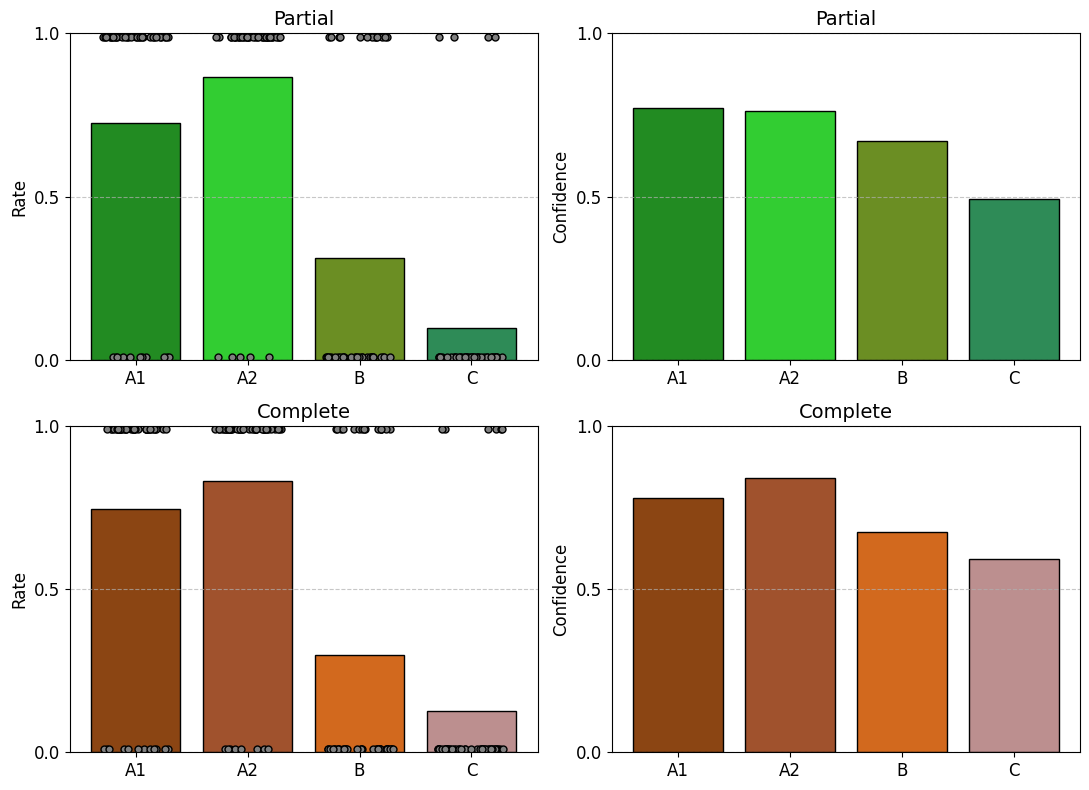

In [17]:
# Function to calculate choice rate and confidence for given table
def cal_rate_conf(table):
    # Add participant_id column
    table['participant_id'] = (table.index // 24) + 1

    # Filter rows where stimLeft and stimRight are in {1, 2, 3, 4}
    filtered_table = table[
        table[['stimLeft', 'stimRight']].apply(lambda x: set(x).issubset({1, 2, 3, 4}), axis=1)
    ]

    # Calculate choice counts and confidence for each stimulus
    stim_counts = filtered_table['chosen'].value_counts().sort_index()
    stim_conf = filtered_table.groupby('chosen')['conf'].mean().sort_index()

    # Ensure all stimulus values {1, 2, 3, 4} are present
    stim_counts = stim_counts.reindex(range(1, 5), fill_value=0)
    stim_conf = stim_conf.reindex(range(1, 5), fill_value=0)

    # Calculate choice rates
    total_count = filtered_table['chosen'].count()
    stim_rates = (stim_counts / total_count)

    # Calculate the count of each stimulus when it is not chosen
    # Create a Series for stim_not_chosen_counts
    stim_not_chosen_counts = pd.Series(0, index=range(1, 5))
    stim_not_chosen_counts = len(filtered_table) / 2 - stim_counts

    return stim_counts, stim_rates*2, stim_conf, stim_not_chosen_counts

def add_dots(ax, counts,counts2, y1, y2):
    for i, count in enumerate(counts):
        new_count = int(count//10)
        x_positions_1 = np.random.uniform(i - 0.3, i + 0.3, new_count)
        ax.scatter(x_positions_1, [y1] * new_count, color='gray', edgecolor='black', s=25)

    for i, count in enumerate(counts2):
        new_count = int(count //10)
        x_positions_2 = np.random.uniform(i - 0.3, i + 0.3, new_count)
        ax.scatter(x_positions_2, [y2] * (new_count), color='gray', edgecolor='black', s=25)

# Process both tables
partial_counts, partial_rates, partial_conf, partial_not_chosen_counts = cal_rate_conf(partial_table_transfer)
complete_counts, complete_rates, complete_conf, complete_not_chosen_counts = cal_rate_conf(complete_table_transfer)

# Plotting
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(11, 8))

# Partial Choice Rate
axes[0, 0].bar(['A1', 'A2', 'B', 'C'], partial_rates, color=['forestgreen', 'limegreen', 'olivedrab', 'seagreen'], edgecolor='black')
axes[0, 0].set_title('Partial', fontsize=14)
axes[0, 0].set_ylabel('Rate', fontsize=12)
axes[0, 0].set_ylim(0, 1)
axes[0, 0].set_yticks([0, 0.5, 1])  # Set y-axis ticks
axes[0, 0].tick_params(axis='x', labelsize=12)
axes[0, 0].tick_params(axis='y', labelsize=12)
axes[0, 0].grid(axis='y', linestyle='--', alpha=0.7)
add_dots(axes[0, 0], partial_counts, partial_not_chosen_counts, y1=0.99, y2=0.01)

# Partial Confidence
axes[0, 1].bar(['A1', 'A2', 'B', 'C'], partial_conf, color=['forestgreen', 'limegreen', 'olivedrab', 'seagreen'], edgecolor='black')
axes[0, 1].set_title('Partial', fontsize=14)
axes[0, 1].set_ylabel('Confidence', fontsize=12)
axes[0, 1].set_ylim(0, 1)
axes[0, 1].set_yticks([0, 0.5, 1])  # Set y-axis ticks
axes[0, 1].tick_params(axis='x', labelsize=12)
axes[0, 1].tick_params(axis='y', labelsize=12)
axes[0, 1].grid(axis='y', linestyle='--', alpha=0.7)

# Complete Choice Rate
axes[1, 0].bar(['A1', 'A2', 'B', 'C'], complete_rates, color=['saddlebrown', 'sienna', 'chocolate', 'rosybrown'], edgecolor='black')
axes[1, 0].set_title('Complete', fontsize=14)
axes[1, 0].set_ylabel('Rate', fontsize=12)
axes[1, 0].set_ylim(0, 1)
axes[1, 0].set_yticks([0, 0.5, 1])  # Set y-axis ticks
axes[1, 0].tick_params(axis='x', labelsize=12)
axes[1, 0].tick_params(axis='y', labelsize=12)
axes[1, 0].grid(axis='y', linestyle='--', alpha=0.7)
add_dots(axes[1, 0], complete_counts,complete_not_chosen_counts, y1=0.99, y2=0.01)

# Complete Confidence
axes[1, 1].bar(['A1', 'A2', 'B', 'C'], complete_conf, color=['saddlebrown', 'sienna', 'chocolate', 'rosybrown'], edgecolor='black')
axes[1, 1].set_title('Complete', fontsize=14)
axes[1, 1].set_ylabel('Confidence', fontsize=12)
axes[1, 1].set_ylim(0, 1)
axes[1, 1].set_yticks([0, 0.5, 1])  # Set y-axis ticks
axes[1, 1].tick_params(axis='x', labelsize=12)
axes[1, 1].tick_params(axis='y', labelsize=12)
axes[1, 1].grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout and display
plt.tight_layout()
plt.show()

# T-test on A1 and A2 in all of the 4 trials

In [48]:
# Partial
# Aggregate the counts of choices for each participant
partial_table_transfer_filtered_participant_counts = partial_table_transfer_filtered.groupby('participant_id')['chosen'].value_counts().unstack(fill_value=0)

# Extract the counts of 1 and 2 for each participant
partial_table_transfer_filtered_count_1_per_participant = partial_table_transfer_filtered_participant_counts.get(1, pd.Series(0, index=partial_table_transfer_filtered_participant_counts.index))
partial_table_transfer_filtered_count_2_per_participant = partial_table_transfer_filtered_participant_counts.get(2, pd.Series(0, index=partial_table_transfer_filtered_participant_counts.index))

# Perform the t-test
partial_table_transfer_filtered_t_stat, partial_table_transfer_filtered_pval = ttest_rel(partial_table_transfer_filtered_count_1_per_participant, partial_table_transfer_filtered_count_2_per_participant)

print('Partial:')
print(f'T-stat: {partial_table_transfer_filtered_t_stat:.4f}')
print(f'P-value: {partial_table_transfer_filtered_pval:.4f}')
if partial_table_transfer_filtered_pval < 0.05:
    print('Participants’ significantly prefer A2 over A1.')
else:
    print('Participants’ doesn\'t significantly prefer A2 over A1.')



# Complete
# Aggregate the counts of choices for each participant
complete_table_transfer_filtered_participant_counts = complete_table_transfer_filtered.groupby('participant_id')['chosen'].value_counts().unstack(fill_value=0)

# Extract the counts of 1 and 2 for each participant
complete_table_transfer_filtered_count_1_per_participant = complete_table_transfer_filtered_participant_counts.get(1, pd.Series(0, index=complete_table_transfer_filtered_participant_counts.index))
complete_table_transfer_filtered_count_2_per_participant = complete_table_transfer_filtered_participant_counts.get(2, pd.Series(0, index=complete_table_transfer_filtered_participant_counts.index))

# Perform the t-test
complete_table_transfer_filtered_t_stat, complete_table_transfer_filtered_pval = ttest_rel(complete_table_transfer_filtered_count_1_per_participant, complete_table_transfer_filtered_count_2_per_participant)

print('Complete:')
print(f'T-stat: {complete_table_transfer_filtered_t_stat:.4f}')
print(f'P-value: {complete_table_transfer_filtered_pval:.4f}')
if complete_table_transfer_filtered_pval < 0.05:
    print('Participants’ significantly prefer A2 over A1.')
else:
    print('Participants’ doesn\'t significantly prefer A2 over A1.')

Partial:
T-stat: -1.7854
P-value: 0.0831
Participants’ doesn't significantly prefer A2 over A1.
Complete:
T-stat: -1.9060
P-value: 0.0637
Participants’ doesn't significantly prefer A2 over A1.


# T-test on confidence between partial and complete

In [49]:
# Split the data into chunks of 24 rows each
partial_table_transfer_chunks = [partial_table_transfer[i:i + 24] for i in range(0, len(partial_table_transfer), 24)]
complete_table_transfer_chunks = [complete_table_transfer[i:i + 24] for i in range(0, len(complete_table_transfer), 24)]

# Calculate mean for each chunk on 'conf' column
partial_table_transfer_means = [np.mean(chunk['conf']) for chunk in partial_table_transfer_chunks]
complete_table_transfer_means = [np.mean(chunk['conf']) for chunk in complete_table_transfer_chunks]

# Apply t-test between the means of the two datasets
comp_part_transfer_means_t_stat, comp_part_transfer_means_pval = ttest_ind(partial_table_transfer_means, complete_table_transfer_means)
comp_part_transfer_means_t_dof = len(partial_table_transfer_means) + len(complete_table_transfer_means) - 2

print(f"t-statistic: {comp_part_transfer_means_t_stat:.4f}")
print(f"p-value: {comp_part_transfer_means_pval:.4f}")
print(f"degrees of freedom: {comp_part_transfer_means_t_dof}")

if comp_part_transfer_means_pval < 0.05:
    print('There is significant difference in confidences between two feedback versions.')
else:
    print('There is no significant difference in confidences between two feedback versions.')

t-statistic: -1.3233
p-value: 0.1898
degrees of freedom: 75
There is no significant difference in confidences between two feedback versions.


# **2.4. Value Estimation**

# Plot C in figure 3

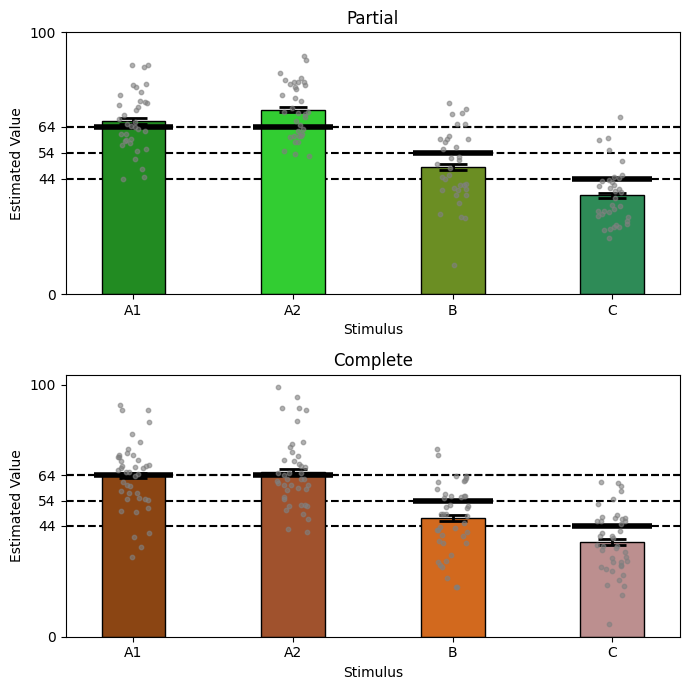

In [3]:
partial_colors = ['forestgreen', 'limegreen', 'olivedrab', 'seagreen']
complete_colors = ['saddlebrown', 'sienna', 'chocolate', 'rosybrown']

# Calculate the mean of estimate for each stim
complete_table_estimate_means = complete_table_estimate.groupby('stim')['estimate'].mean().reset_index()
partial_table_estimate_means = partial_table_estimate.groupby('stim')['estimate'].mean().reset_index()

# Calculate the standard error of the mean (SEM) for each stim
complete_sem = complete_table_estimate.groupby('stim')['estimate'].sem().reset_index()
partial_sem = partial_table_estimate.groupby('stim')['estimate'].sem().reset_index()

# Merge SEM with the mean dataframes
complete_stats = pd.merge(complete_table_estimate_means, complete_sem, on='stim')
partial_stats = pd.merge(partial_table_estimate_means, partial_sem, on='stim')

# Rename columns for clarity
complete_stats.columns = ['stim', 'mean_estimate', 'sem']
partial_stats.columns = ['stim', 'mean_estimate', 'sem']

# Data for plotting
x = complete_stats['stim']
complete_y = complete_stats['mean_estimate']
complete_err = complete_stats['sem']
partial_y = partial_stats['mean_estimate']
partial_err = partial_stats['sem']

# Split the dataset into chunks of participants
num_trials_per_participant = 16
num_stimuli = 4

# Calculate the number of participants
num_participants_complete = len(complete_table_estimate) // num_trials_per_participant
num_participants_partial = len(partial_table_estimate) // num_trials_per_participant

# Split the datasets
complete_participants = [complete_table_estimate[i*num_trials_per_participant:(i+1)*num_trials_per_participant] for i in range(num_participants_complete)]
partial_participants = [partial_table_estimate[i*num_trials_per_participant:(i+1)*num_trials_per_participant] for i in range(num_participants_partial)]

# Calculate the mean estimate for each stim for each participant
complete_means_per_participant = pd.DataFrame([df.groupby('stim')['estimate'].mean().values for df in complete_participants], columns=[1, 2, 3, 4])
partial_means_per_participant = pd.DataFrame([df.groupby('stim')['estimate'].mean().values for df in partial_participants], columns=[1, 2, 3, 4])

# Mean values for the normal distributions
horizontal_means = [64, 64, 54, 44]

# Define labels and colors
labels = ['A1', 'A2', 'B', 'C']

# Create the plots with error bars, thinner bars, and less diffused mean dots for each participant
fig, axs = plt.subplots(2, 1, figsize=(7, 7))

# Custom error bar capstyle
error_kw = {'capsize': 10, 'capthick': 2, 'elinewidth': 2, 'color': 'black'}

# Width of bars
bar_width = 0.4
dot_jitter_range = 0.1  # Range for x-axis jitter

# Function to draw horizontal lines with a black border and dashed lines to the y-axis
def draw_line_dashed(ax, y, x_start, x_end, color, label_y, linewidth=4, borderwidth=5):
    ax.axhline(y=y, color='black', linestyle='dashed', xmin=0, xmax=1, zorder=0)
    ax.hlines(y, x_start, x_end, colors=color, linewidth=linewidth, zorder=2, edgecolor='black')

# Plot for partial
axs[0].bar(x, partial_y, yerr=partial_err, error_kw=error_kw, color=partial_colors, width=bar_width, tick_label=labels, edgecolor='black')
for i, mean in enumerate(horizontal_means):
    draw_line_dashed(axs[0], mean, i + 1 - bar_width/2 - 0.05, i + 1 + bar_width/2 + 0.05, partial_colors[i], mean)
for stim in range(1, num_stimuli+1):
    x_jitter = np.random.uniform(-dot_jitter_range, dot_jitter_range, size=len(partial_means_per_participant))
    axs[0].scatter(stim + x_jitter, partial_means_per_participant[stim], color='gray', alpha=0.6, zorder=3, s=10)
axs[0].set_title('Partial')
axs[0].set_xlabel('Stimulus')
axs[0].set_ylabel('Estimated Value')
axs[0].set_yticks([0, 44, 54, 64, 100])
axs[0].set_yticklabels([0, 44, 54, 64, 100])

# Plot for complete
axs[1].bar(x, complete_y, yerr=complete_err, error_kw=error_kw, color=complete_colors, width=bar_width, tick_label=labels, edgecolor='black')
for i, mean in enumerate(horizontal_means):
    draw_line_dashed(axs[1], mean, i + 1 - bar_width/2 - 0.05, i + 1 + bar_width/2 + 0.05, complete_colors[i], mean)
for stim in range(1, num_stimuli+1):
    x_jitter = np.random.uniform(-dot_jitter_range, dot_jitter_range, size=len(complete_means_per_participant))
    axs[1].scatter(stim + x_jitter, complete_means_per_participant[stim], color='gray', alpha=0.6, zorder=3, s=10)
axs[1].set_title('Complete')
axs[1].set_xlabel('Stimulus')
axs[1].set_ylabel('Estimated Value')
axs[1].set_yticks([0, 44, 54, 64, 100])
axs[1].set_yticklabels([0, 44, 54, 64, 100])

# Display the plots
plt.tight_layout()
plt.show()


# T-test on A1 & A2 estimation

In [6]:
# Partial:
partial_table_estimate['participant_id'] = (partial_table_estimate.index // 16) + 1

# Calculate mean estimate for stim 1 and stim 2 for each participant
partial_mean_estimate_stim1 = partial_table_estimate[partial_table_estimate['stim'] == 1].groupby('participant_id')['estimate'].mean().tolist()
partial_mean_estimate_stim2 = partial_table_estimate[partial_table_estimate['stim'] == 2].groupby('participant_id')['estimate'].mean().tolist()

# Perform the paired t-test
partial_table_estimate_mean1_2_t_statistic, partial_table_estimate_mean1_2_p_value = ttest_rel(partial_mean_estimate_stim1, partial_mean_estimate_stim2)

partial_mean_estimate_dof = len(partial_mean_estimate_stim1) - 1

# Print the results
print("Partial:")
print(f'T-statistic: {partial_table_estimate_mean1_2_t_statistic:.4f}, P-value: {partial_table_estimate_mean1_2_p_value:.4f}, dof: {partial_mean_estimate_dof}')
if partial_table_estimate_mean1_2_p_value < 0.05:
    print('There is significant difference in estimation between A1 and A2.')
else:
    print('There is no significant difference in estimation between A1 and A2.')

# Complete:
complete_table_estimate['participant_id'] = (complete_table_estimate.index // 16) + 1

# Calculate mean estimate for stim 1 and stim 2 for each participant
complete_mean_estimate_stim1 = complete_table_estimate[complete_table_estimate['stim'] == 1].groupby('participant_id')['estimate'].mean().tolist()
complete_mean_estimate_stim2 = complete_table_estimate[complete_table_estimate['stim'] == 2].groupby('participant_id')['estimate'].mean().tolist()

# Perform the paired t-test
complete_table_estimate_mean1_2_t_statistic, complete_table_estimate_mean1_2_p_value = ttest_rel(complete_mean_estimate_stim1, complete_mean_estimate_stim2)

complete_mean_estimate_dof = len(complete_mean_estimate_stim1) - 1

# Print the results
print("Complete:")
print(f'T-statistic: {complete_table_estimate_mean1_2_t_statistic:.4f}, P-value: {complete_table_estimate_mean1_2_p_value:.4f}, dof: {complete_mean_estimate_dof}')
if complete_table_estimate_mean1_2_p_value < 0.05:
    print('There is significant difference in estimation between A1 and A2.')
else:
    print('There is no significant difference in estimation between A1 and A2.')

Partial:
T-statistic: -1.4891, P-value: 0.1457, dof: 34
There is no significant difference in estimation between A1 and A2.
Complete:
T-statistic: -0.4555, P-value: 0.6511, dof: 41
There is no significant difference in estimation between A1 and A2.


# T-test on estimation variabilities between complete & partial

In [11]:
def calculate_standard_error(df):
    std_errors = df.groupby('stim').apply(lambda x: x['estimate'].std() / (len(x) ** 0.5))
    return std_errors

def process_participants(df):
    num_trials_per_participant = 16
    num_participants = len(df) // num_trials_per_participant

    participants_std_errors = []

    for i in range(num_participants):
        participant_df = df.iloc[i * num_trials_per_participant:(i + 1) * num_trials_per_participant]
        std_errors = calculate_standard_error(participant_df)
        mean_std_error = std_errors.mean()
        participants_std_errors.append(mean_std_error)

    return participants_std_errors

# Calculate standard errors for both complete and partial datasets
complete_table_estimate_std_errors = process_participants(complete_table_estimate)
partial_table_estimate_std_errors = process_participants(partial_table_estimate)

# Perform a t-test on the two lists
com_par_table_estimate_std_errors_t_statistic, com_par_table_estimate_std_errors_pval = ttest_ind(partial_table_estimate_std_errors, complete_table_estimate_std_errors)

com_par_table_estimate_std_errors_t_statistic_dof = len(complete_table_estimate_std_errors) + len(partial_table_estimate_std_errors) - 2

# Output the t-test result
print(f'T-statistic: {com_par_table_estimate_std_errors_t_statistic:.4f}, P-value: {com_par_table_estimate_std_errors_pval:.4f}, dof: {com_par_table_estimate_std_errors_t_statistic_dof}')
if com_par_table_estimate_std_errors_pval < 0.05:
    print('There is significant difference in estimation variabilities in the two feedback versions.')
else:
    print('There is no significant difference in estimation variabilities in the two feedback versions.')


T-statistic: 0.1411, P-value: 0.8881, dof: 75
There is no significant difference in estimation variabilities in the two feedback versions.
